# Setting Environment

In [1]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
# from dotenv import load_dotenv
# load_dotenv("creds.env")
# project_path = os.getenv("PROJECT_PATH")

project_path = "/content/drive/Othercomputers/Laptop/Freelance Work 2024(End)/Ehsanullah Tehsin/Dissertation (Image Captioning)/Implementation"
os.chdir(project_path)

In [3]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for string operations
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag, FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from collections import Counter

# Libraries for Image operations
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray
from skimage import feature, io, color

In [4]:
# Downloading essential things of NLTK
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Loading Data

In [ ]:
# Function to read Caption file
def load_captions(captions_file):
    # Loading the captions into a DataFrame
    return pd.read_csv(captions_file, delimiter=',')

In [ ]:
# Function to Load data
def load_dataset(image_dir, captions_df):

    # Dictionary to store the images and captions
    dataset = {}

    # Looping through the DataFrame and load images
    for index, row in tqdm(captions_df.iterrows()):
        image_path = os.path.join(image_dir, row['image'])
        try:
            image = Image.open(image_path)
            # Store the image and caption in the dictionary
            dataset[row['image']] = {'image': image, 'caption': row['caption']}
        except IOError:
            print(f"Error opening {image_path}")

    return dataset

In [ ]:
image_dir = 'data/Images'
captions_file = 'data/captions.txt'

# Loading captions
captions_df = load_captions(captions_file).sample(20000)

# Loading the dataset
dataset = load_dataset(image_dir, captions_df)
print("Dataset loaded successfully.")

20000it [1:39:19,  3.36it/s]

Dataset loaded successfully.


# Data Exploration

In [ ]:
# Display basic information about the dataset
print("Basic Information:")
print(captions_df.info())

# Display the first few rows of the dataset
print("\nFirst few captions:")
captions_df.head()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 7297 to 28932
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    20000 non-null  object
 1   caption  20000 non-null  object
dtypes: object(2)
memory usage: 468.8+ KB
None

First few captions:


,image,caption
7297,2294688426_96c8614f1d.jpg,"A man with a beard , dressed in black , is smo..."
27258,3402638444_dab914a3de.jpg,Six young people posing for the camera inside ...
2069,1414779054_31946f9dfc.jpg,A young boy wearing blue jumps off of a cement...
3409,172097782_f0844ec317.jpg,Person in red ski jacket skiing backwards
27819,3425414048_fa14d33067.jpg,Little boy rides around playground on a motori...


In [ ]:
# Create a single string with all captions
all_captions = ' '.join(captions_df['caption'].tolist()).lower()

# Calculate the total number of words in the captions
words = all_captions.split()
print(f"\nTotal number of words in captions: {len(words)}")


Total number of words in captions: 235051


In [ ]:
# Calculate the number of unique words
unique_words = set(words)
print(f"Number of unique words: {len(unique_words)}")

# Most common words
word_counts = Counter(words)
most_common = word_counts.most_common(10)
print("\nMost common words:")
print(most_common)

Number of unique words: 6549

Most common words:
[('a', 30991), ('.', 18158), ('in', 9390), ('the', 9231), ('on', 5195), ('is', 4608), ('and', 4330), ('dog', 4016), ('with', 3730), ('man', 3611)]


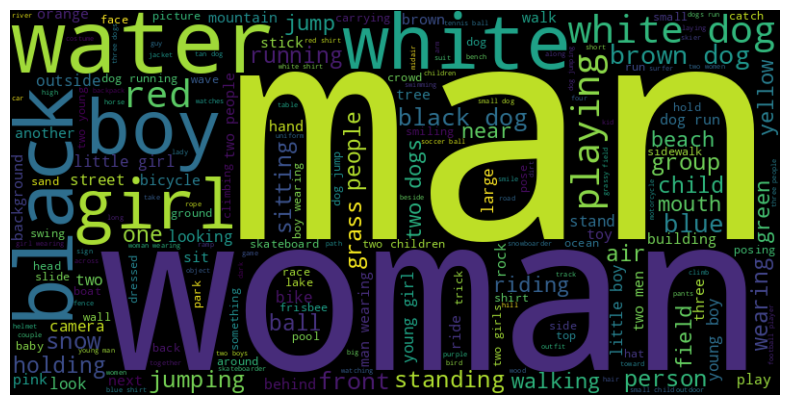

In [ ]:
# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_captions)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

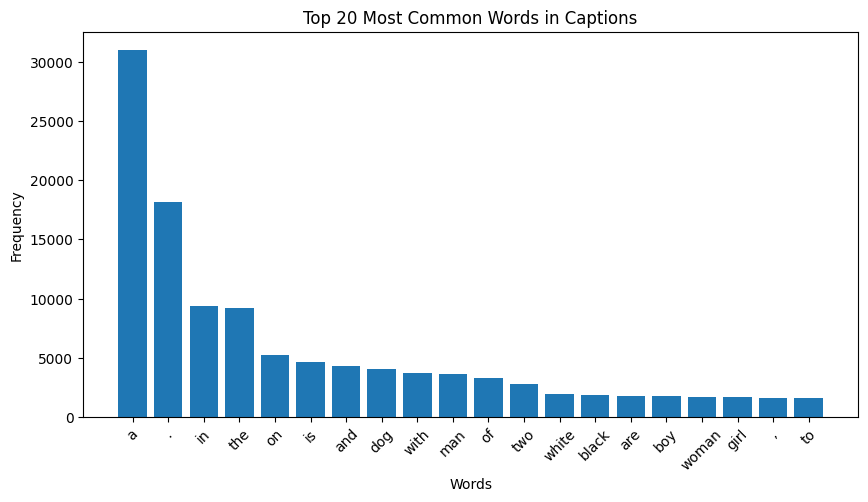

In [ ]:
# Plot the frequency of the most common words
top_words = word_counts.most_common(20)
plt.figure(figsize=(10, 5))
plt.bar(*zip(*top_words))
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words in Captions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# NLTK Stop words
stop_words = set(stopwords.words('english'))
# Add any additional stopwords or symbols to filter
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '...'])

# Split into words and filter out stopwords and punctuation
words = [word for word in all_captions.split() if word not in stop_words and word not in string.punctuation]

# Calculate the total number of words in the filtered captions
print(f"\nTotal number of words in filtered captions: {len(words)}")

# Calculate the number of unique words
unique_words = set(words)
print(f"Number of unique words: {len(unique_words)}")

# Most common words
word_counts = Counter(words)
most_common = word_counts.most_common(20)
print("\nMost common words after filtering stopwords and symbols:")
print(most_common)


Total number of words in filtered captions: 124126
Number of unique words: 6433

Most common words after filtering stopwords and symbols:
[('dog', 4016), ('man', 3611), ('two', 2775), ('white', 1957), ('black', 1893), ('boy', 1740), ('woman', 1694), ('girl', 1661), ('wearing', 1501), ('people', 1395), ('water', 1351), ('red', 1308), ('young', 1276), ('brown', 1240), ('blue', 1137), ('dogs', 1080), ('running', 1034), ('playing', 988), ('shirt', 915), ('ball', 887)]


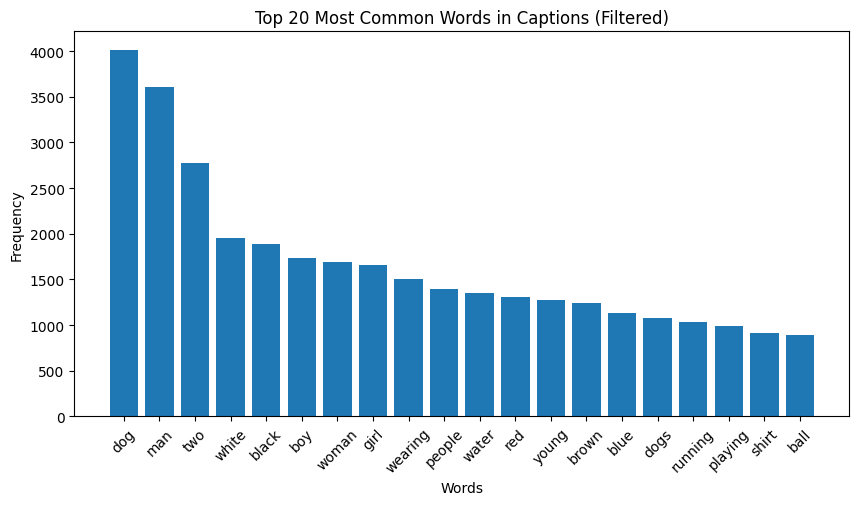

In [ ]:
# Plot the frequency of the most common words
plt.figure(figsize=(10, 5))
plt.bar(*zip(*most_common))
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words in Captions (Filtered)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

Image: 2294688426_96c8614f1d.jpg
Caption: A man dressed in a black poncho stands in the middle of a parking lot .


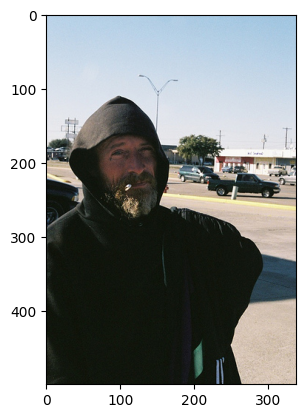

In [ ]:
# Displaying an example
image_name = list(dataset.keys())[0]
image = dataset[image_name]['image']
caption = dataset[image_name]['caption']

# Display the image and caption
print("Image:", image_name)
print("Caption:", caption)
plt.imshow(image)
plt.show()

Average Image Width: 457.74 pixels
Average Image Height: 397.14 pixels


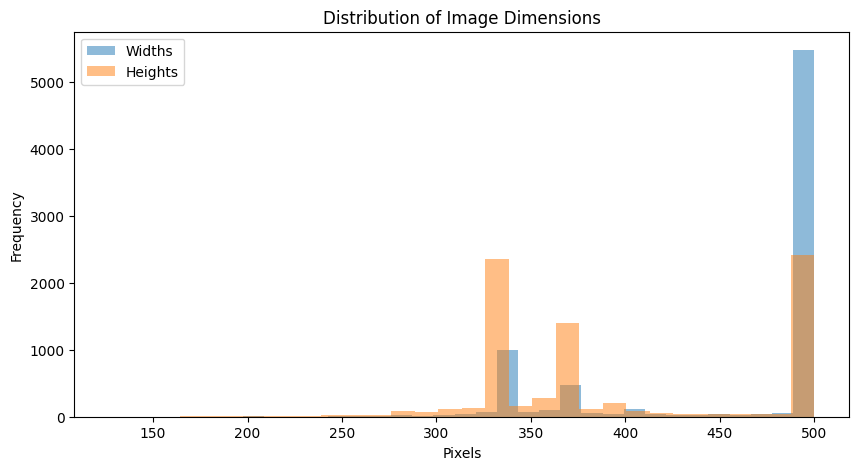

In [ ]:
def analyze_images(dataset):
    # Analyzing image dimensions
    widths, heights = [], []
    for info in dataset.values():
        img = info['image']
        widths.append(img.width)
        heights.append(img.height)

    # Displaying average dimensions
    print(f"Average Image Width: {np.mean(widths):.2f} pixels")
    print(f"Average Image Height: {np.mean(heights):.2f} pixels")

    # Plotting the distribution of image dimensions
    plt.figure(figsize=(10, 5))
    plt.hist(widths, bins=30, alpha=0.5, label='Widths')
    plt.hist(heights, bins=30, alpha=0.5, label='Heights')
    plt.title('Distribution of Image Dimensions')
    plt.xlabel('Pixels')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

analyze_images(dataset)

In [ ]:
import pickle

# Save the dataset dictionary to a file
with open('dataset.pkl', 'wb') as f:
  pickle.dump(dataset, f)

# Data Preparation

In [10]:
import pickle

# To load the dataset later:
with open('dataset.pkl', 'rb') as f:
  dataset = pickle.load(f)

In [11]:
# Caption lengths
caption_lengths = [len(info['caption'].split()) for info in dataset.values()]

# Calculate percentiles
lower_bound = np.percentile(caption_lengths, 5)
upper_bound = np.percentile(caption_lengths, 90)

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Filter dataset
filtered_dataset = {k: v for k, v in dataset.items()
                     if lower_bound <= len(v['caption'].split()) <= upper_bound}

print(f"Original dataset size: {len(dataset)}")
print(f"Filtered dataset size: {len(filtered_dataset)}")

Lower Bound: 6.0
Upper Bound: 17.0
Original dataset size: 7826
Filtered dataset size: 7064


## Text Preprocessing

In [12]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Function to clean the captions
def clean_caption(caption):
    caption = caption.lower()
    caption = re.sub(r"[^a-zA-Z0-9]+", ' ', caption)
    caption = 'startseq ' + caption + ' endseq'
    return caption

# Clean all captions in the dataset
for key in dataset:
    dataset[key]['caption'] = clean_caption(dataset[key]['caption'])

# Tokenize the captions
captions = [dataset[key]['caption'] for key in dataset]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(captions)
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary size:", vocab_size)

Vocabulary size: 4311


In [16]:
# Convert captions to sequences of tokens and pad them
mean_length = int(np.mean(caption_lengths))
print("Mean caption length:", mean_length)

max_length = mean_length

for key in dataset:
    sequence = tokenizer.texts_to_sequences([dataset[key]['caption']])[0]
    dataset[key]['sequence'] = pad_sequences([sequence], maxlen=max_length, padding='post')[0]

Mean caption length: 11


## Image Preprocessing

In [17]:
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
import numpy as np
from PIL import Image
from tqdm import tqdm

# Load the VGG16 model pre-trained on ImageNet
vgg_model = VGG16(weights='imagenet')
feature_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.layers[-2].output)

# Function to preprocess images
def preprocess_image(image):
    # Resize the image
    image = image.resize((224, 224))

    # Convert the image to array
    image = img_to_array(image)

    # Expand dimensions to match the input shape of the model
    image = np.expand_dims(image, axis=0)

    # Preprocess the image
    image = preprocess_input(image)
    return image

# Prepare a batch of images
batch_size = 64
image_keys = list(dataset.keys())
num_batches = len(image_keys) // batch_size + (1 if len(image_keys) % batch_size != 0 else 0)

# Iterate through batches
for i in tqdm(range(num_batches)):
    batch_keys = image_keys[i * batch_size:(i + 1) * batch_size]
    batch_images = np.vstack([preprocess_image(dataset[key]['image']) for key in batch_keys])

    # Extract features for the batch
    batch_features = feature_extractor.predict(batch_images, verbose=0)

    # Assign the features back to the dataset
    for j, key in enumerate(batch_keys):
        dataset[key]['features'] = batch_features[j]

print("Feature extraction completed.")

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


100%|██████████| 123/123 [01:12<00:00,  1.69it/s]

Feature extraction completed.


In [18]:
import pickle

# Save the dataset dictionary to a file
with open('prepared_dataset.pkl', 'wb') as f:
  pickle.dump(dataset, f)

# Modeling

## Model Training

In [ ]:
import pickle

# To load the dataset later:
with open('prepared_dataset.pkl', 'rb') as f:
  dataset = pickle.load(f)

In [19]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Prepare the data for training and testing
def create_sequences(tokenizer, max_length, dataset):
    X1, X2, y = [], [], []
    for key in dataset:
        seq = dataset[key]['sequence']
        for i in range(1, len(seq)):
            in_seq, out_seq = seq[:i], seq[i]
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            X1.append(dataset[key]['features'])
            X2.append(in_seq)
            y.append(out_seq)
    return np.array(X1), np.array(X2), np.array(y)

# Create sequences for the entire dataset
X1, X2, y = create_sequences(tokenizer, max_length, dataset)

# Split the data into training and testing sets
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X1, X2, y, test_size=0.2, random_state=42)

In [20]:
from keras.models import Model
from keras.layers import Input, Dense, Embedding, LSTM, Dropout, BatchNormalization, add
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the CNN feature extractor model
image_input = Input(shape=(4096,))
image_features = Dropout(0.6)(image_input)
image_features = Dense(16, activation='relu', kernel_regularizer=l2(0.03))(image_features)  # Reduced units, increased regularization
image_features = BatchNormalization()(image_features)  # Added BatchNormalization

# Define the sequence model
sequence_input = Input(shape=(max_length,))
sequence_features = Embedding(vocab_size, 128, mask_zero=True)(sequence_input)  # Reduced embedding size
sequence_features = Dropout(0.6)(sequence_features)
sequence_features = LSTM(16, kernel_regularizer=l2(0.03), use_cudnn=False, recurrent_regularizer=l2(0.03))(sequence_features)  # Reduced units, increased regularization
sequence_features = BatchNormalization()(sequence_features)  # Added BatchNormalization

# Combine the CNN and LSTM models
decoder = add([image_features, sequence_features])
decoder = Dense(32, activation='relu', kernel_regularizer=l2(0.03))(decoder)  # Reduced units, increased regularization
decoder = BatchNormalization()(decoder)  # Added BatchNormalization
outputs = Dense(vocab_size, activation='softmax')(decoder)

# Define the final model
model = Model(inputs=[image_input, sequence_input], outputs=outputs)

model.compile(loss='categorical_crossentropy', optimizer='adam')

# Implement early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('mean_length_methods/best_model.keras', monitor='val_loss', save_best_only=True)

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 11)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 4096)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 11, 128)        │        551,808 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 4096)           │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 11, 128)        │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 11)             │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 16)             │         65,552 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 16)             │          9,280 │ dropout_1[0][0],       │
│                           │                        │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 16)             │             64 │ dense[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 16)             │             64 │ lstm[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 16)             │              0 │ batch_normalization[0… │
│                           │                        │                │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 32)             │            544 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 32)             │            128 │ dense_1[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 4311)           │        142,263 │ batch_normalization_2… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 769,703 (2.94 MB)

 Trainable params: 769,575 (2.94 MB)

 Non-trainable params: 128 (512.00 B)

In [21]:
# Train the model on the training set
history = model.fit([X1_train, X2_train], y_train,
                    epochs=30,
                    batch_size=64,
                    validation_data=([X1_test, X2_test], y_test),
                    verbose=1,
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/30
979/979 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - loss: 7.3796 - val_loss: 4.3972
Epoch 2/30
979/979 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4.1984 - val_loss: 4.0260
Epoch 3/30
979/979 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.8558 - val_loss: 3.9169
Epoch 4/30
979/979 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 3.6698 - val_loss: 3.8460
Epoch 5/30
979/979 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.5317 - val_loss: 3.7946
Epoch 6/30
979/979 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.4623 - val_loss: 3.7873
Epoch 7/30
979/979 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.3520 - val_loss: 3.7798
Epoch 8/30
979/979 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.3112 - val_loss: 3.8032
Epoch 9/30
979/979 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.2519 - val_loss: 3.8355
Epoch 10/30
979/979 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.1989 - val_loss: 3.8374
Epoch 11/30
979/979 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.1609 - val_loss: 3.8384
Epoch 12/30
979/979 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/st

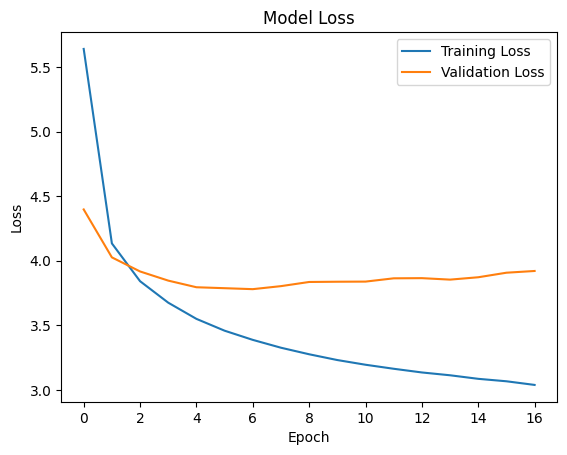

In [22]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Saving Methods for Web APP

In [23]:
import pickle
from keras.models import load_model

# Save the trained model
model.save('mean_length_methods/image_captioning_model.keras')
feature_extractor.save('mean_length_methods/feature_extractor.keras')

import joblib
# Save the tokenizer
with open('mean_length_methods/tokenizer.pkl', 'wb') as file:
    joblib.dump(tokenizer, file)

# For example, you might want to save max_length and vocab_size
with open('mean_length_methods/config.pkl', 'wb') as file:
    joblib.dump({'max_length': max_length, 'vocab_size': vocab_size}, file)

print("Model, tokenizer, and configuration saved successfully.")

Model, tokenizer, and configuration saved successfully.


In [ ]:
# # Loading best model
# from keras.models import load_model
# best_model = load_model('best_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py:210: UserWarning: Model doesn't support `jit_compile=True`. Proceeding with `jit_compile=False`.
  warnings.warn(


## Evaluation

In [24]:
def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([np.expand_dims(photo, axis=0), sequence], verbose=0)
        yhat = np.argmax(yhat)

        # Check if the predicted index is in the tokenizer's index_word dictionary
        word = tokenizer.index_word.get(yhat)
        if word is None:
            break

        in_text += ' ' + word
        if word == 'endseq':
            break
    return in_text

In [25]:
import random

# Function to generate captions for a sample of test images
def generate_captions_for_samples(model, tokenizer, dataset, max_length, X1_test, num_samples=10):
    results = []
    for i in range(num_samples):
        idx = random.randint(0, len(X1_test) - 1)
        features = X1_test[idx]

        actual_caption = None
        image_name = None
        for key in dataset:
            if np.array_equal(dataset[key]['features'], features):
                actual_caption = dataset[key]['caption']
                image_name = key
                break
        predicted_caption = generate_desc(model, tokenizer, features, max_length)
        predicted_caption = predicted_caption.split()
        predicted_caption = ' '.join(predicted_caption[1:-1])
        results.append({"Image": image_name, "Actual Caption": actual_caption, "Predicted Caption": predicted_caption})
    return results

# Generate captions for 10 random samples from the test set
sample_captions = generate_captions_for_samples(model, tokenizer, dataset, max_length, X1_test, num_samples=10)

# Convert the results to a pandas DataFrame
df_pred = pd.DataFrame(sample_captions)
df_pred["Actual Caption"] = df_pred["Actual Caption"].apply(lambda x: x.split()[1:-1])
df_pred["Actual Caption"] = df_pred["Actual Caption"].apply(lambda x: ' '.join(x))
df_pred

,Image,Actual Caption,Predicted Caption
0,2256133102_e2c8314ecb.jpg,a man is hanging by a line off a cliff above w...,a man is standing on a beach
1,3184112120_6ddcd98016.jpg,girl touches young man s face as young man in ...,a man is standing on a sidewalk
2,2346772831_b2748ba1f0.jpg,children at the park with their parents,a man is standing on a large building
3,484896012_7787d04f41.jpg,young boy kicks a red and white soccer ball on...,a soccer ball in the grass
4,2932498509_27cb0038ec.jpg,two boys splashing in the surf,a boy is playing in the water
5,3402081035_a54cfab1d9.jpg,a man parachuting down a snowy mountain,a man is riding a snowy hill
6,391579205_c8373b5411.jpg,an airborne dog on a leash with a woman,a man is playing in a park
7,3397803103_8a46d716f4.jpg,a dog leaps in the snow to catch a ball,a dog running through the snow
8,3163323414_d1ce127aa6.jpg,a group of woman in red shirts are singing,a man in a crowd of a crowd
9,3245912109_fdeef6b456.jpg,a group of people gather in front of a histori...,a man in a crowd of people


In [26]:
# Generate captions for 10 random samples from the test set
sample_captions = generate_captions_for_samples(model, tokenizer, dataset, max_length, X1_train, num_samples=50)

# Convert the results to a pandas DataFrame
df_pred_train = pd.DataFrame(sample_captions)
df_pred_train["Actual Caption"] = df_pred_train["Actual Caption"].apply(lambda x: x.split()[1:-1])
df_pred_train["Actual Caption"] = df_pred_train["Actual Caption"].apply(lambda x: ' '.join(x))
df_pred_train

,Image,Actual Caption,Predicted Caption
0,1356796100_b265479721.jpg,a girl in a flowered dress peaking through som...,a man is playing in a field
1,3265162450_5b4e3c5f1b.jpg,three dogs running through the snow,a dog running through the snow
2,3589156060_3ed8d6bbc3.jpg,a wet dog and person in a marsh,a dog is running through the beach
3,2994104606_bc2df6c1f4.jpg,white and brown dog with mouth open running on...,a dog is running through the grass
4,2396746868_0727e06983.jpg,two little blonde boys play on a slide in the ...,a boy is playing in the beach
5,2893476169_f38dd32051.jpg,a skateboarder flies thorugh the air while oth...,a boy is playing in the air
6,403678611_73978faed7.jpg,a man in a cap with a goatee leans against the...,a man is standing on a wooden wall
7,2577972703_a22c5f2a87.jpg,the girl in a pink top is standing next to a r...,a boy is playing in a field
8,3035785330_2fd5e32bb1.jpg,a man is giving a little boy a piggy back on t...,a man is standing on a sidewalk
9,3073535022_4af81f360c.jpg,a surfer in a yellow shirt riding a wave on a ...,a boy is surfing in the water


In [27]:
df_pred.to_csv('predictions.csv', index=False)
df_pred_train.to_csv('predictions_train.csv', index=False)

In [28]:
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction

# Function to evaluate the model using BLEU scores
def evaluate_model(model, tokenizer, max_length, X1, dataset):
    actual, predicted = [], []
    for i in range(len(X1)):
        # Generate description
        yhat = generate_desc(model, tokenizer, X1[i], max_length)
        # Find the corresponding actual caption
        for key in dataset:
            if np.array_equal(dataset[key]['features'], X1[i]):
                actual_caption = dataset[key]['caption']
                break
        # Store actual and predicted
        references = [actual_caption.split()]
        actual.append(references)
        predicted.append(yhat.split())
    # Calculate BLEU scores
    smoothie = SmoothingFunction().method4
    bleu1 = corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0), smoothing_function=smoothie)
    bleu2 = corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothie)
    bleu3 = corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0), smoothing_function=smoothie)
    bleu4 = corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smoothie)
    return bleu1, bleu2, bleu3, bleu4

# Evaluate the model on a subset of the test set
subset_size = 100
bleu1, bleu2, bleu3, bleu4 = evaluate_model(model, tokenizer, max_length, X1_train[:subset_size], dataset)
print('BLEU-1: %f' % bleu1)
print('BLEU-2: %f' % bleu2)
print('BLEU-3: %f' % bleu3)
print('BLEU-4: %f' % bleu4)

BLEU-1: 0.321574
BLEU-2: 0.177661
BLEU-3: 0.091696
BLEU-4: 0.046959


In [29]:
# Evaluate the model on a subset of the test set
subset_size = 100
bleu1, bleu2, bleu3, bleu4 = evaluate_model(model, tokenizer, max_length, X1_test[:subset_size], dataset)
print('BLEU-1: %f' % bleu1)
print('BLEU-2: %f' % bleu2)
print('BLEU-3: %f' % bleu3)
print('BLEU-4: %f' % bleu4)

BLEU-1: 0.314231
BLEU-2: 0.167534
BLEU-3: 0.085090
BLEU-4: 0.042223
